In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [2]:
aging_data = pd.read_csv('7.xlsx_scaled.csv', header=None)

In [3]:
aging_value = aging_data.iloc[:, 82];


In [4]:
aging_value_rows = aging_value[aging_value > 0]

In [5]:
non_aging_value_rows = aging_value[aging_value == 0]
p = []

RanksumsResult(statistic=4.309738429139839, pvalue=1.634477541788861e-05)
RanksumsResult(statistic=3.818133285131492, pvalue=0.00013446527676545027)
RanksumsResult(statistic=3.8509069613987155, pvalue=0.00011768120263944915)
RanksumsResult(statistic=6.292545843306837, pvalue=3.123010524169066e-10)
RanksumsResult(statistic=6.21061165263878, pvalue=5.277876010056705e-10)
RanksumsResult(statistic=5.456817098492648, pvalue=4.847452151967281e-08)
RanksumsResult(statistic=3.932841152066773, pvalue=8.39477153143489e-05)
RanksumsResult(statistic=4.3507055244738675, pvalue=1.357001940205992e-05)
RanksumsResult(statistic=3.9820016664676077, pvalue=6.833730055916246e-05)
RanksumsResult(statistic=4.334318686340256, pvalue=1.4621223727543774e-05)
RanksumsResult(statistic=3.949227990200385, pvalue=7.840364899395988e-05)
RanksumsResult(statistic=4.530960743943595, pvalue=5.871604948173489e-06)
RanksumsResult(statistic=3.8017464469978806, pvalue=0.00014367972497927604)
RanksumsResult(statistic=3.85910

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


RanksumsResult(statistic=5.932035404367383, pvalue=2.9920208313610285e-09)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=0.0, pvalue=1.0)
RanksumsResult(statistic=6.128677461970722, pvalue=8.861255514710104e-10)
RanksumsResult(statistic=6.259772167039614, pvalue=3.8554031523417876e-10)
RanksumsResult(statistic=5.882874889966548, pvalue=4.032007110770528e-09)
RanksumsResult(statistic=5.89926172810016, pvalue=3.651316457823317e-09)
RanksumsResult(statistic=5.833714375565713, pvalue=5.420688306592032e-09)
RanksumsR

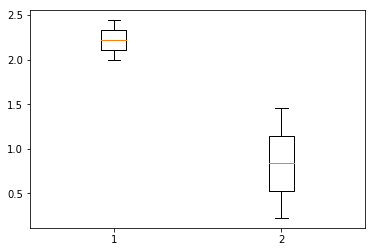

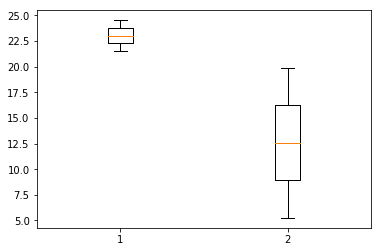

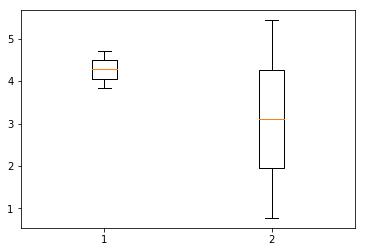

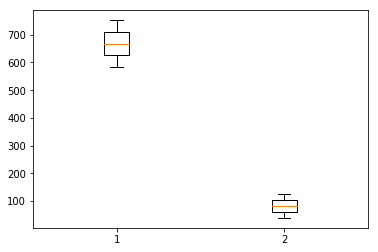

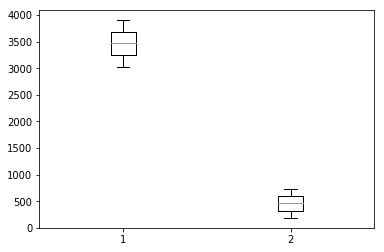

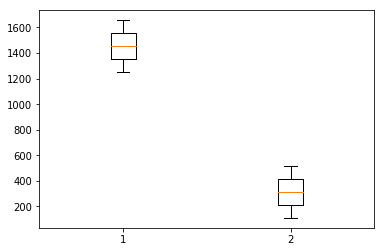

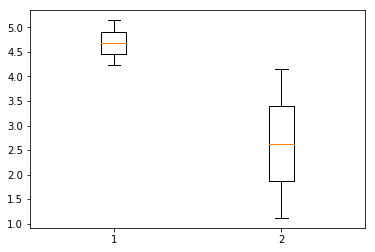

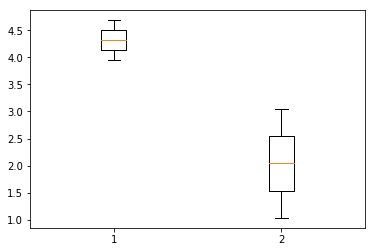

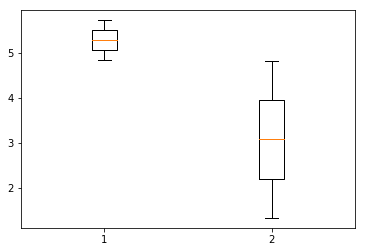

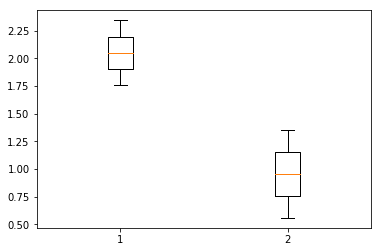

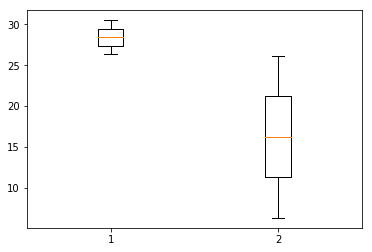

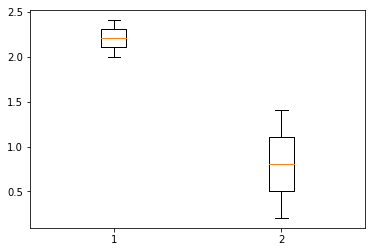

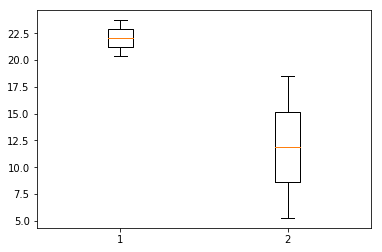

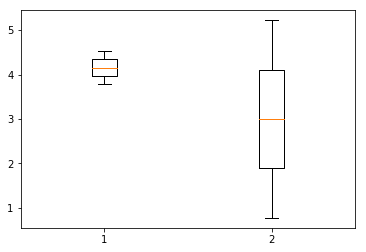

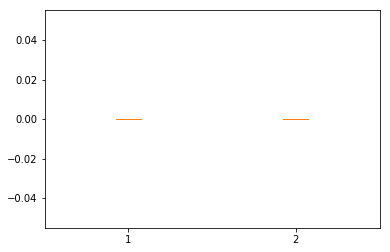

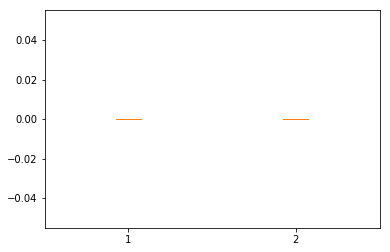

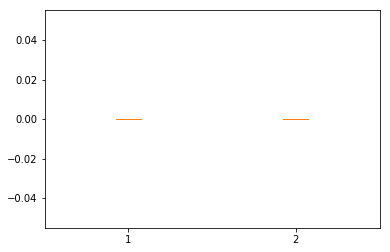

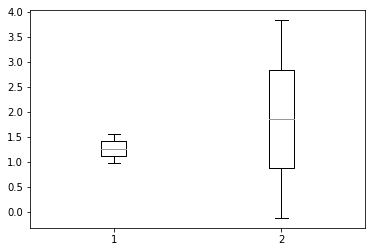

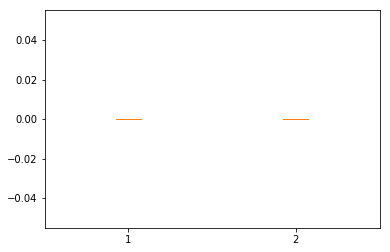

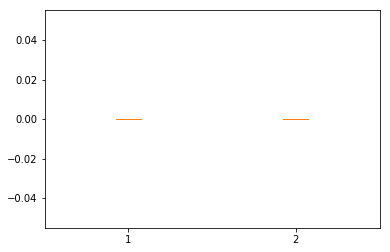

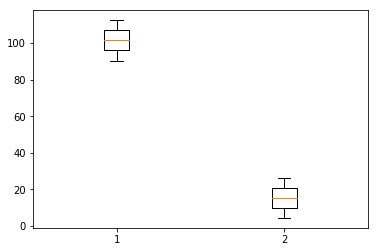

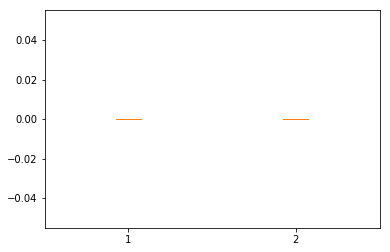

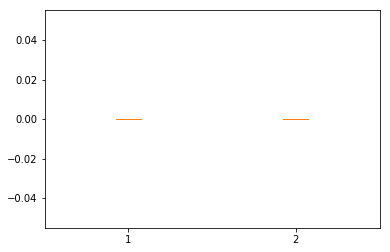

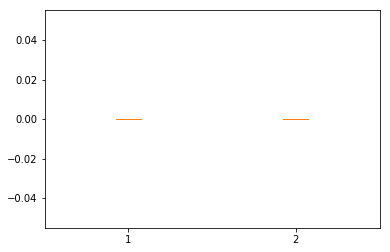

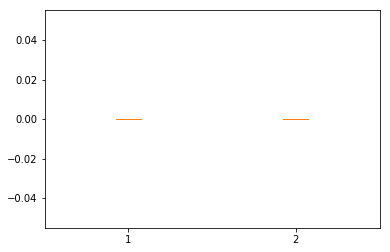

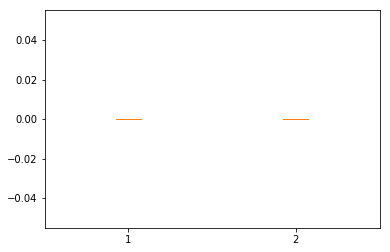

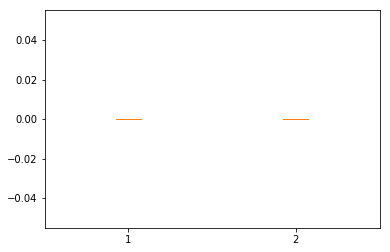

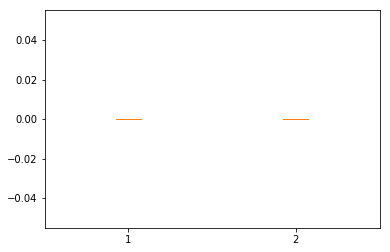

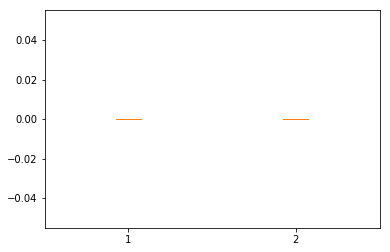

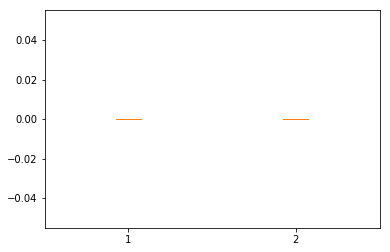

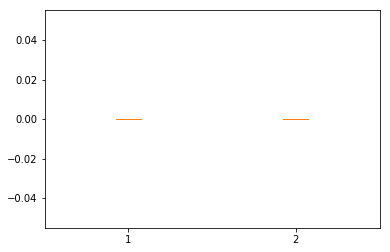

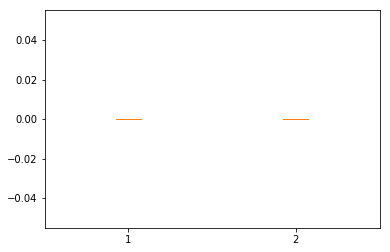

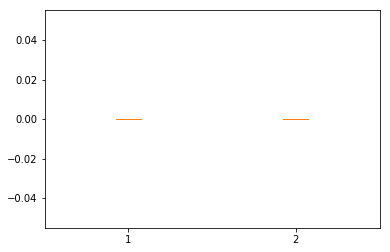

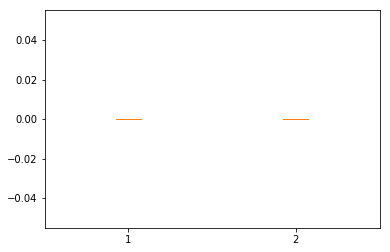

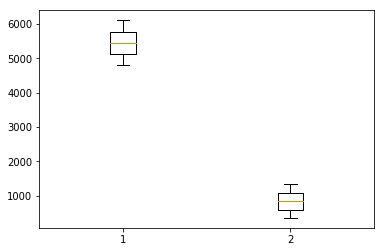

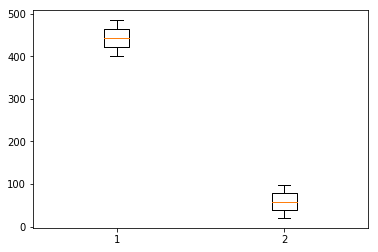

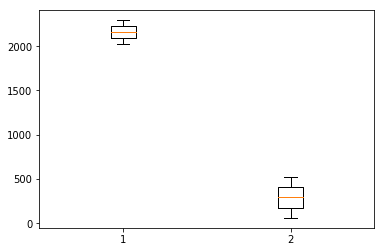

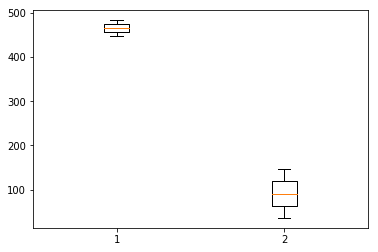

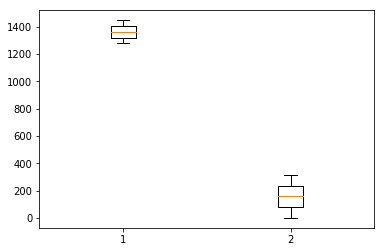

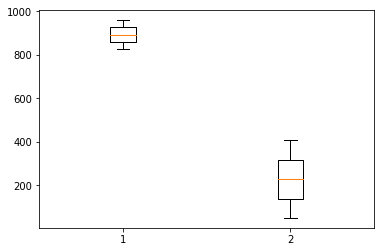

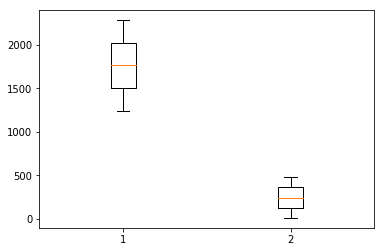

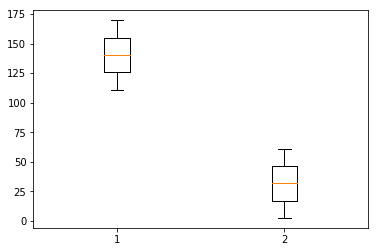

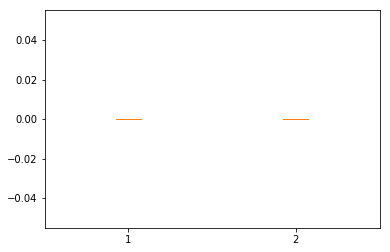

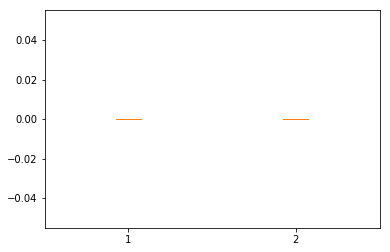

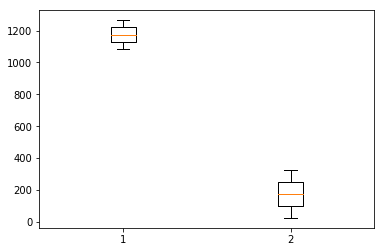

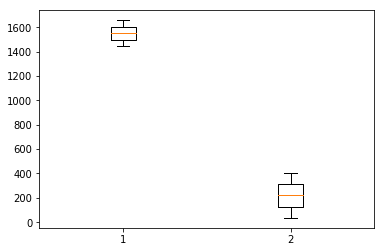

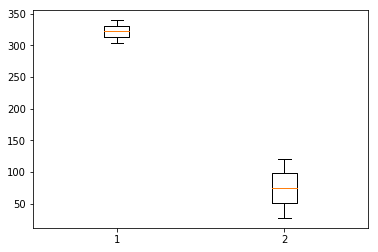

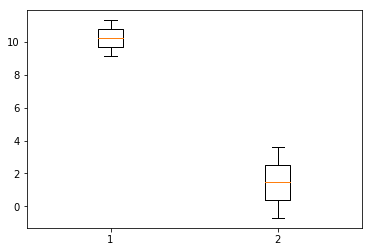

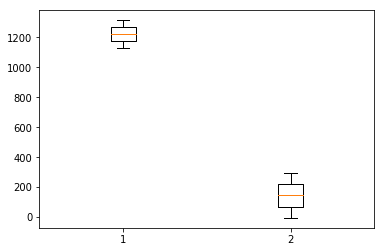

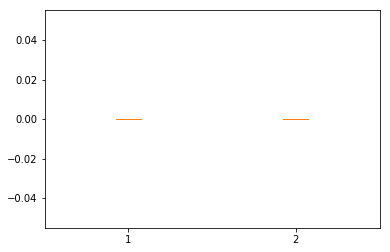

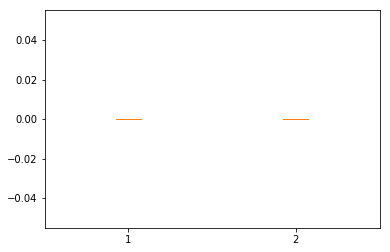

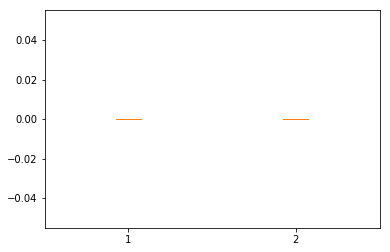

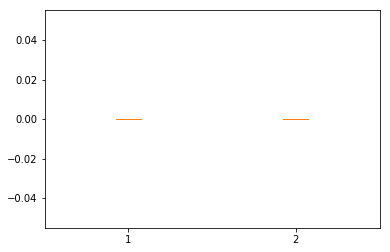

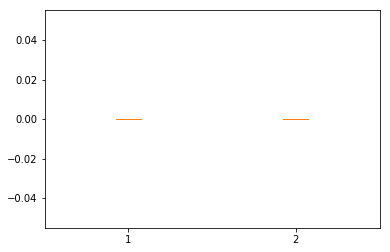

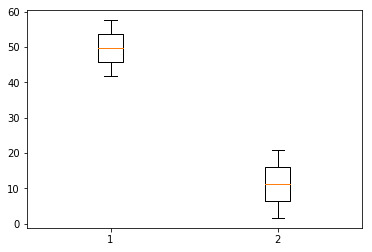

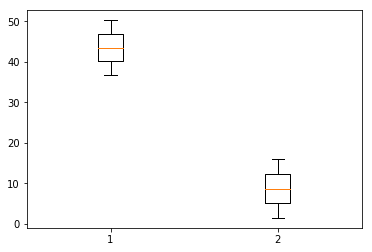

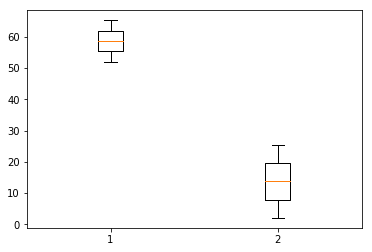

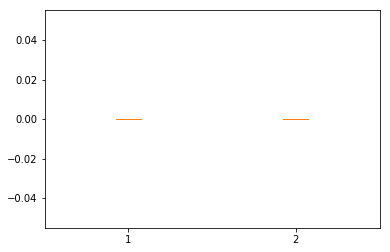

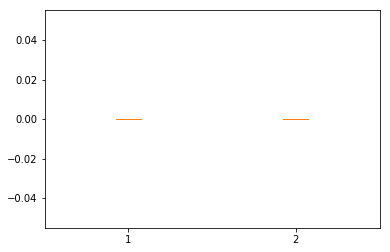

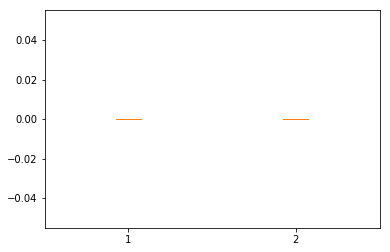

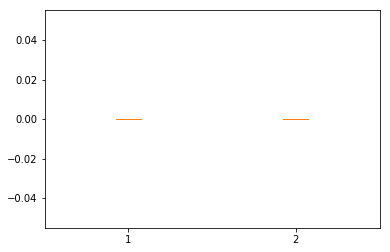

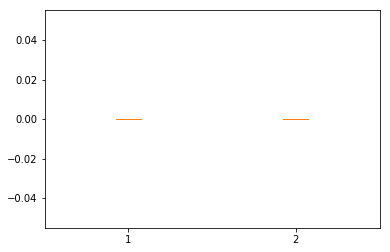

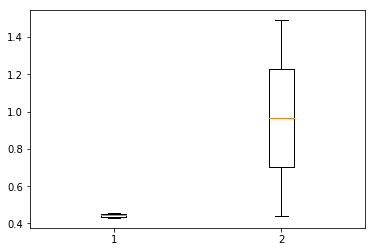

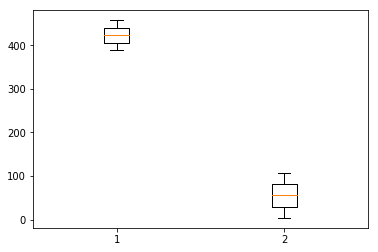

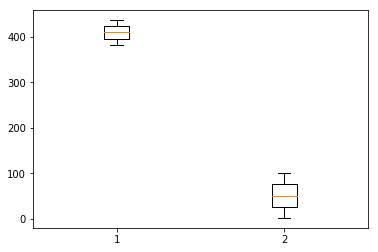

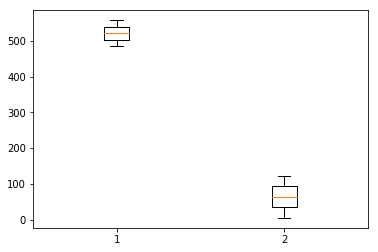

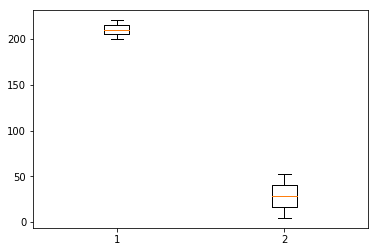

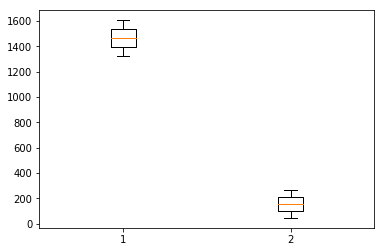

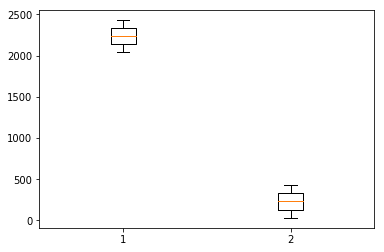

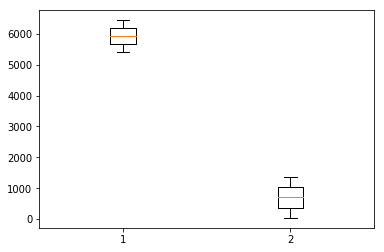

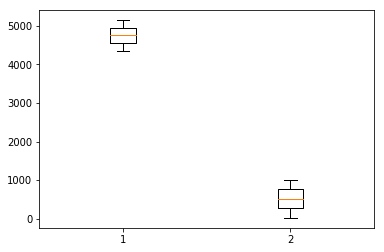

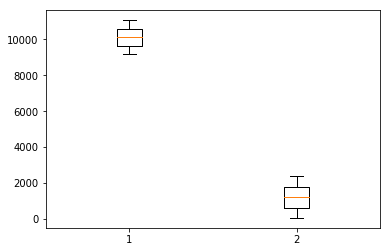

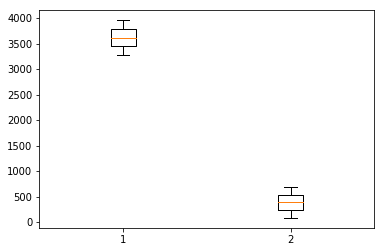

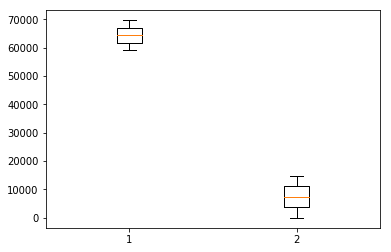

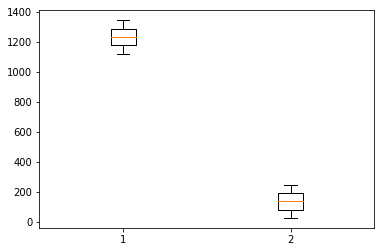

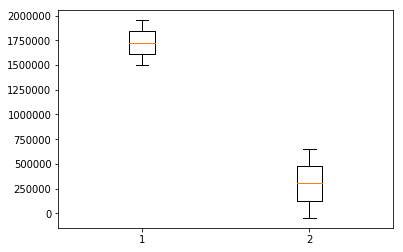

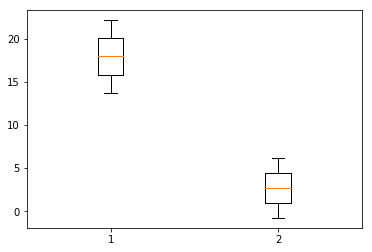

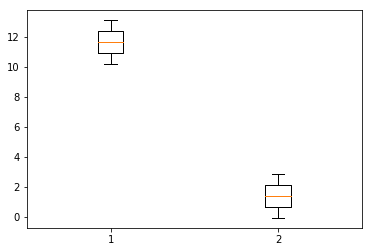

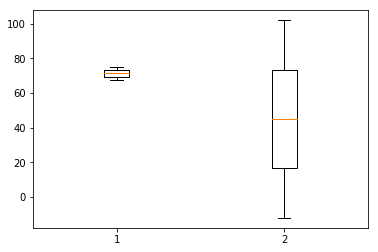

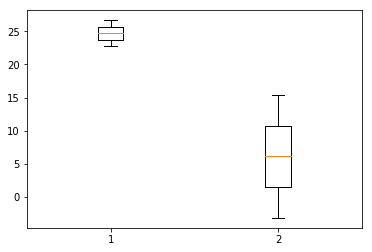

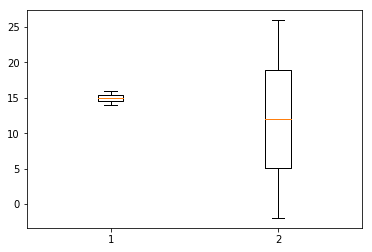

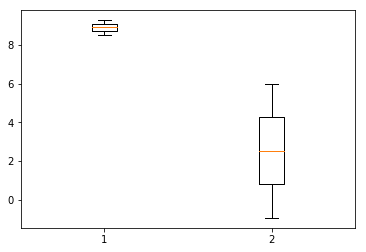

In [6]:
from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes
from scipy.stats import ranksums
for i in range(0,82):
    feature_column = aging_data.iloc[:, i]
    feature_column_aging_value = feature_column.iloc[aging_value_rows.index]
    feature_column_non_aging_value = feature_column.iloc[non_aging_value_rows.index]
    confidance_interval_aging = mean_confidence_interval(feature_column_aging_value)
    confidance_interval_non_aging = mean_confidence_interval(feature_column_non_aging_value)
    pair = [confidance_interval_aging, confidance_interval_non_aging]
    fig = plt.figure()
    plt.boxplot(pair)
    index = str(i+1)
    fig.savefig("box_plots7/box"+index)
    p.append(ranksums(feature_column_aging_value, feature_column_non_aging_value) )
    print(p[i])

In [7]:
%store -r result_array

In [8]:
for i in range(0, 82):
    if (p[i][1] <= 0.05):
        result_array[6].append(1)
           
    else:
        result_array[6].append(0)

In [9]:
len(result_array[6])

82

In [10]:
%store result_array

Stored 'result_array' (list)


In [12]:
result_array[6]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [13]:
results = pd.DataFrame(np.array(result_array))

In [17]:
results.iloc[0, 15]

0

In [18]:
%store result_array

Stored 'result_array' (list)


In [21]:
results.to_csv('results.csv',header=None, index=None)